In [1]:
import tensorflow as tf
import os
import numpy as np

# Paths to dataset
ORIGINAL_IMAGE_PATH = "/Users/priyasingh/Downloads/lung segmentation/Chest-X-Ray/Chest-X-Ray/image"  # Replace with your image directory
ORIGINAL_MASK_PATH = "/Users/priyasingh/Downloads/lung segmentation/Chest-X-Ray/Chest-X-Ray/mask"    # Replace with your mask directory
AUGMENTED_IMAGE_PATH = "/Users/priyasingh/Desktop/augmented data/augmented image"
AUGMENTED_MASK_PATH = "/Users/priyasingh/Desktop/augmented data/augmented masks"

# Function to load images and masks
def load_data(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(image, (256, 256))
    
    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)
    mask = tf.image.resize(mask, (256, 256))
    
    return image, mask

# Function to apply augmentations
def augment_data(image, mask):
    augmented_images = []
    augmented_masks = []
    
    # Apply augmentations
    for _ in range(3):  # Generate 3 augmentations per image
        augmented_image, augmented_mask = image, mask
        
        # Random flip
        if tf.random.uniform(()) > 0.5:
            augmented_image = tf.image.flip_left_right(augmented_image)
            augmented_mask = tf.image.flip_left_right(augmented_mask)

        # Random rotation
        if tf.random.uniform(()) > 0.5:
            angle = tf.random.uniform((), minval=-15, maxval=15, dtype=tf.float32) * (3.14159 / 180)
            augmented_image = tf.image.rot90(augmented_image)
            augmented_mask = tf.image.rot90(augmented_mask)

        # Random brightness
        if tf.random.uniform(()) > 0.5:
            augmented_image = tf.image.adjust_brightness(augmented_image, delta=0.1)

        augmented_images.append(augmented_image)
        augmented_masks.append(augmented_mask)
    
    return augmented_images, augmented_masks

# Save augmented images and masks to disk
def save_augmented_dataset():
    # List image and mask files
    image_files = sorted([os.path.join(ORIGINAL_IMAGE_PATH, f) for f in os.listdir(ORIGINAL_IMAGE_PATH) if f.endswith('.png')])
    mask_files = sorted([os.path.join(ORIGINAL_MASK_PATH, f) for f in os.listdir(ORIGINAL_MASK_PATH) if f.endswith('.png')])

    count = 0
    for img_path, mask_path in zip(image_files, mask_files):
        # Load image and mask
        image, mask = load_data(img_path, mask_path)

        # Generate augmented data
        augmented_images, augmented_masks = augment_data(image, mask)
        
        # Save original image and mask
        original_image_name = f"original_{count}.png"
        original_mask_name = f"original_mask_{count}.png"
        tf.keras.utils.save_img(os.path.join(AUGMENTED_IMAGE_PATH, original_image_name), image.numpy())
        tf.keras.utils.save_img(os.path.join(AUGMENTED_MASK_PATH, original_mask_name), mask.numpy())
        
        # Save augmented images and masks
        for i, (aug_img, aug_mask) in enumerate(zip(augmented_images, augmented_masks)):
            aug_image_name = f"augmented_{count}_{i}.png"
            aug_mask_name = f"augmented_mask_{count}_{i}.png"
            tf.keras.utils.save_img(os.path.join(AUGMENTED_IMAGE_PATH, aug_image_name), aug_img.numpy())
            tf.keras.utils.save_img(os.path.join(AUGMENTED_MASK_PATH, aug_mask_name), aug_mask.numpy())
        
        count += 1
        print(f"Saved augmentations for image {count}/{len(image_files)}")

save_augmented_dataset()


2025-01-14 17:29:38.091245: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Saved augmentations for image 1/704
Saved augmentations for image 2/704
Saved augmentations for image 3/704
Saved augmentations for image 4/704
Saved augmentations for image 5/704
Saved augmentations for image 6/704
Saved augmentations for image 7/704
Saved augmentations for image 8/704
Saved augmentations for image 9/704
Saved augmentations for image 10/704
Saved augmentations for image 11/704
Saved augmentations for image 12/704
Saved augmentations for image 13/704
Saved augmentations for image 14/704
Saved augmentations for image 15/704
Saved augmentations for image 16/704
Saved augmentations for image 17/704
Saved augmentations for image 18/704
Saved augmentations for image 19/704
Saved augmentations for image 20/704
Saved augmentations for image 21/704
Saved augmentations for image 22/704
Saved augmentations for image 23/704
Saved augmentations for image 24/704
Saved augmentations for image 25/704
Saved augmentations for image 26/704
Saved augmentations for image 27/704
Saved augm

In [20]:
# TensorFlow and Keras Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint

# Image Processing Libraries
import cv2
from cv2 import imread,resize
from scipy.ndimage import label, find_objects

# Data Handling Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# File and Operating System Libraries
import os

# Warnings Management
import warnings
warnings.filterwarnings('ignore')

# GPU Configuration
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.config.list_physical_devices('GPU'))

# PATHS
IMG_PATH = '/Users/priyasingh/Downloads/lung segmentation/Chest-X-Ray/Chest-X-Ray/image'
MSK_PATH = '/Users/priyasingh/Downloads/lung segmentation/Chest-X-Ray/Chest-X-Ray/mask'

[]


In [21]:
metadata = pd.read_csv('/Users/priyasingh/Downloads/lung segmentation/MetaData.csv')
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       704 non-null    int64 
 1   gender   704 non-null    object
 2   age      704 non-null    object
 3   county   704 non-null    object
 4   ptb      704 non-null    int64 
 5   remarks  699 non-null    object
dtypes: int64(2), object(4)
memory usage: 33.1+ KB


In [22]:
metadata.head()

,id,gender,age,county,ptb,remarks
0,1000,male,31,Shenxhen,0,normal
1,1001,male,64,Shenxhen,0,normal
2,1002,male,35,Shenxhen,0,normal
3,1003,male,32,Shenxhen,1,"STB,ATB,tuberculosis pleuritis"
4,1004,male,2,Shenxhen,1,secondary PTB in the bilateral upper field


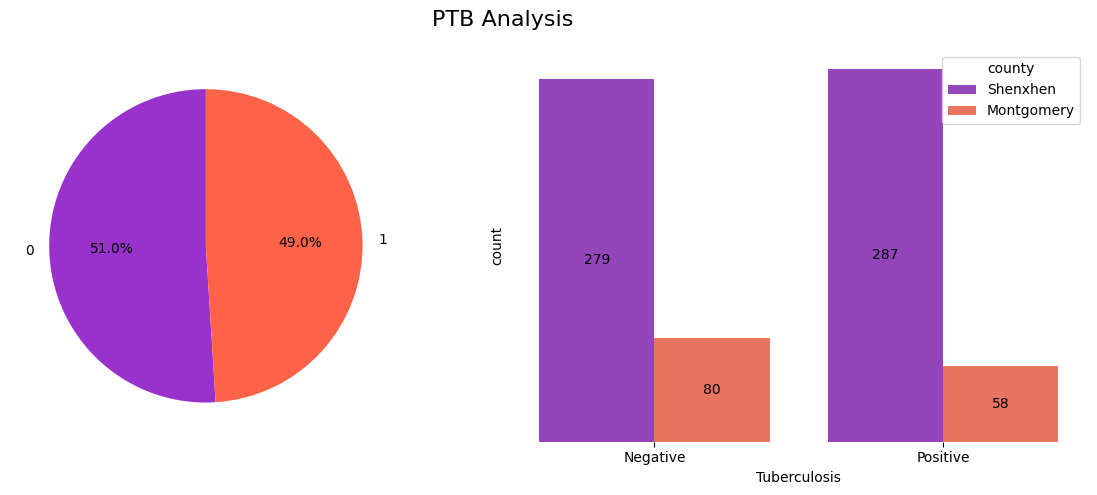

In [23]:
agg_data = metadata.ptb.value_counts()
ct = pd.crosstab(metadata['gender'], metadata['ptb'])

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.pie(agg_data,labels=agg_data.index,autopct='%1.1f%%', startangle=90,colors=['darkorchid','tomato'])

plt.subplot(122)
bars = sns.countplot(metadata,x='ptb',hue='county',palette=['darkorchid','tomato'])
plt.bar_label(bars.containers[0], label_type='center')
plt.bar_label(bars.containers[1], label_type='center')
plt.yticks([])
plt.xticks([0,1],labels=['Negative','Positive'])
plt.xlabel('Tuberculosis')
plt.box(False)

plt.suptitle('PTB Analysis',fontsize=16)
plt.tight_layout()
plt.show()

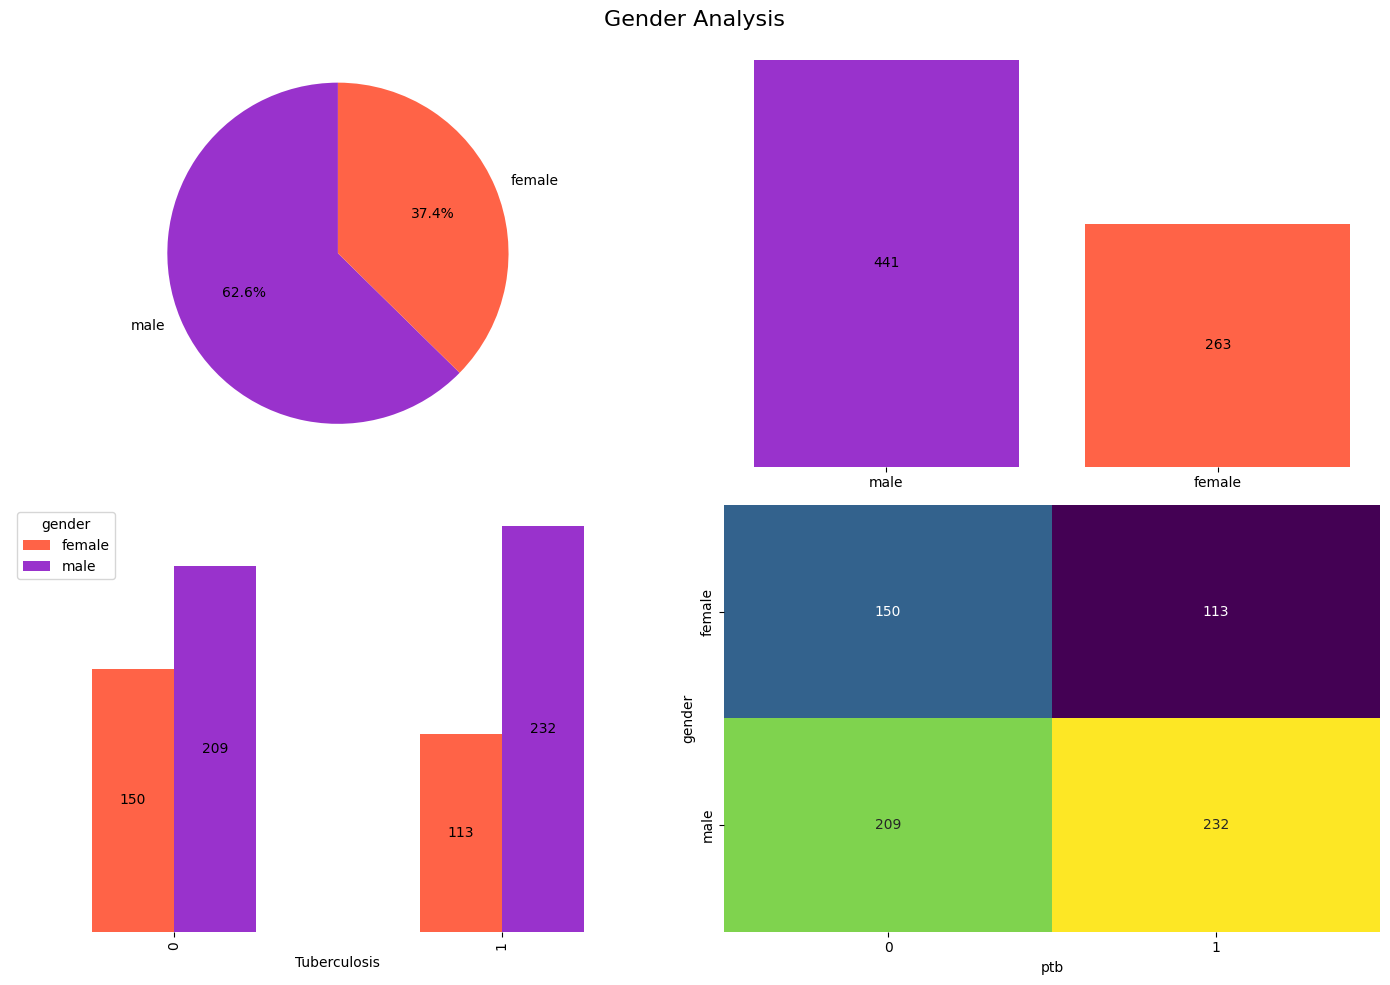

In [24]:
gender_mapping = {
    'm': 'male', 'Male,': 'male', 'male35yrs': 'male', 'male,':'male',
    'f': 'female', 'femal': 'female', 'female24yrs':'female','o':'female','female,':'female'
}
metadata.gender = metadata.gender.str.lower()
metadata.gender.replace(gender_mapping,inplace=True)
agg_data = metadata.gender.value_counts()
ct = pd.crosstab(metadata['gender'], metadata['ptb'])

plt.figure(figsize=(14,10))
plt.subplot(221)
plt.pie(agg_data,labels=agg_data.index,autopct='%1.1f%%', startangle=90,colors=['darkorchid','tomato'])

plt.subplot(222)
bars = plt.bar(agg_data.index,agg_data,color=['darkorchid','tomato'])
plt.bar_label(bars, labels=[str(height) for height in agg_data],label_type='center')
plt.yticks([])
plt.box(False)

plt.subplot(223)
bars = ct.T.plot(kind='bar', color=['tomato', 'darkorchid'],ax=plt.gca())
plt.bar_label(bars.containers[0], label_type='center')
plt.bar_label(bars.containers[1], label_type='center')
plt.xlabel('Tuberculosis')
plt.yticks([])
plt.box(False)

plt.subplot(224)
sns.heatmap(ct,annot=True,cbar=False,fmt='d',cmap='viridis')

plt.suptitle('Gender Analysis',fontsize=16)
plt.tight_layout()
plt.show()

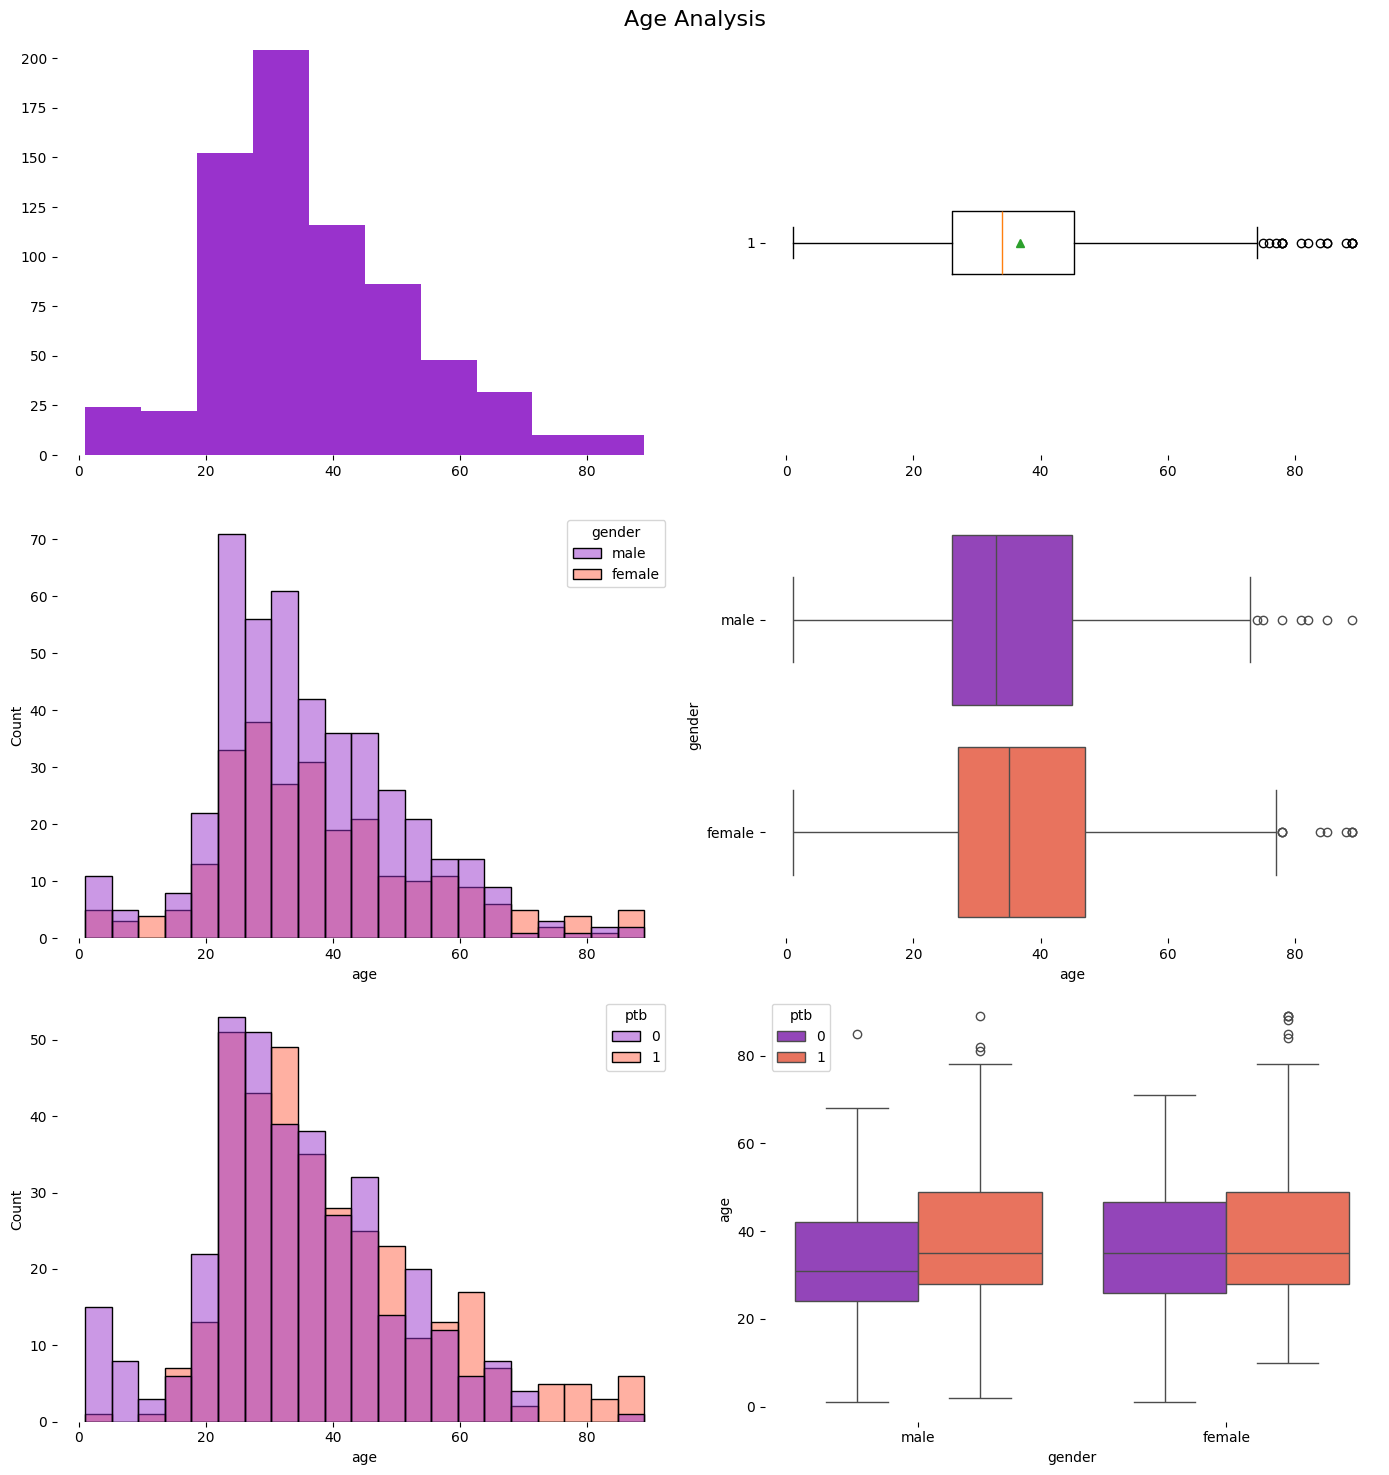

In [25]:
metadata.age = (metadata.age
                .replace({'16month':'1','39yr':'39','1yr':'1','male35':'35','female24':'24'})
                .astype(int))
custom_palette = ['darkorchid','tomato']

plt.figure(figsize=(14,15))
plt.subplot(321)
plt.hist(metadata.age,color='darkorchid')
plt.box(False)

plt.subplot(322)
plt.boxplot(metadata.age,vert=False,showmeans=True)
plt.box(False)

plt.subplot(323)
sns.histplot(metadata,x='age',hue='gender',palette=custom_palette)
plt.box(False)

plt.subplot(324)
sns.boxplot(metadata,x='age',y='gender',palette=custom_palette)
plt.box(False)

plt.subplot(325)
sns.histplot(metadata,x='age',hue='ptb',palette=custom_palette)
plt.box(False)

plt.subplot(326)
sns.boxplot(data=metadata, x='gender', y='age', hue='ptb', palette=custom_palette)
plt.box(False)


plt.suptitle('Age Analysis',fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

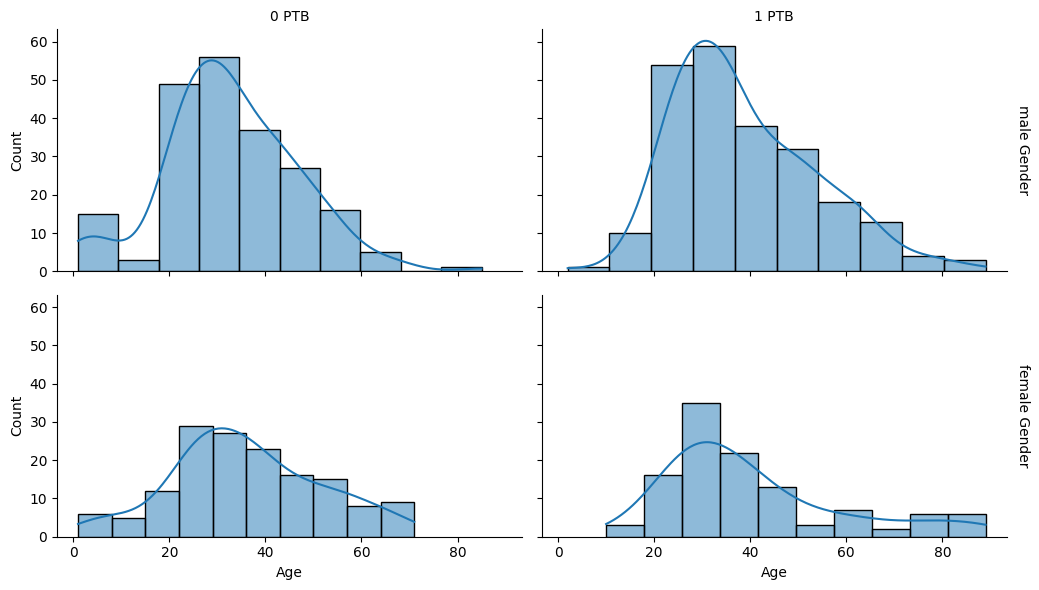

In [26]:
# FacetGrid of Age by Gender and PTB
plt.figure(figsize=(14,8))
g = sns.FacetGrid(metadata, col='ptb', row='gender', margin_titles=True,aspect=1.75)
g.map(sns.histplot, 'age', bins=10, kde=True)

# Adding titles and labels
g.set_axis_labels('Age', 'Count')
g.set_titles(col_template="{col_name} PTB", row_template="{row_name} Gender")

# Show the plot
plt.show()

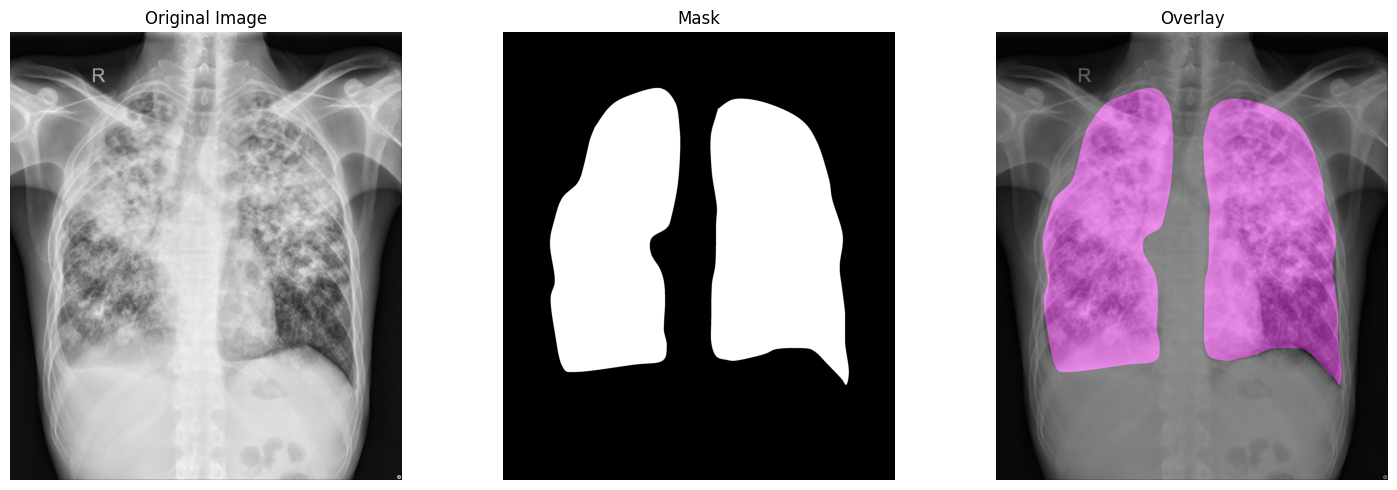

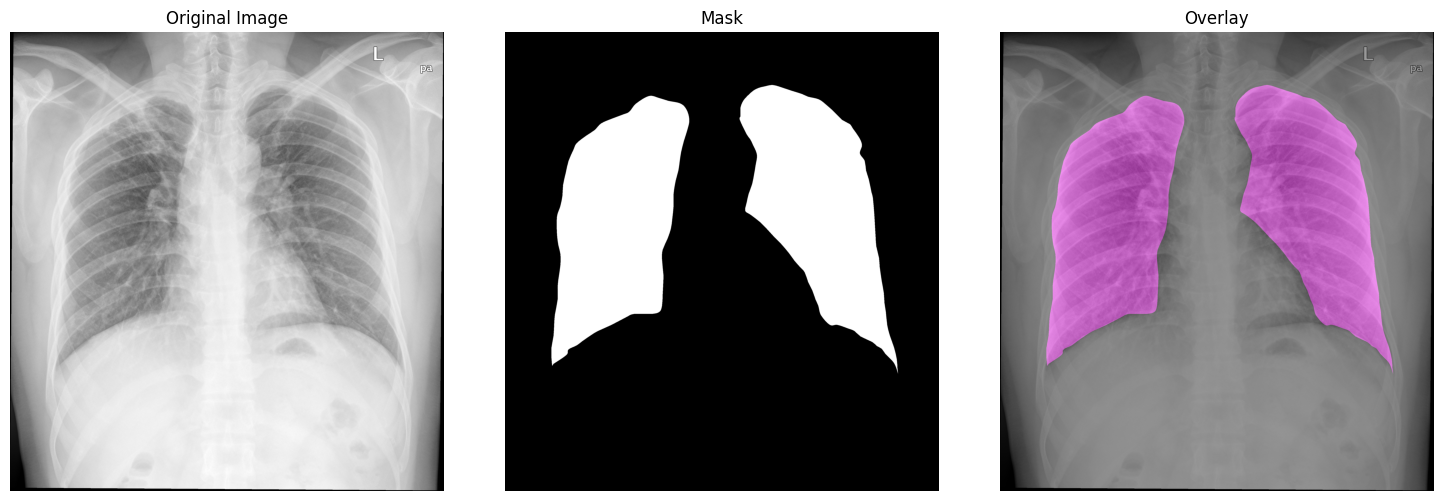

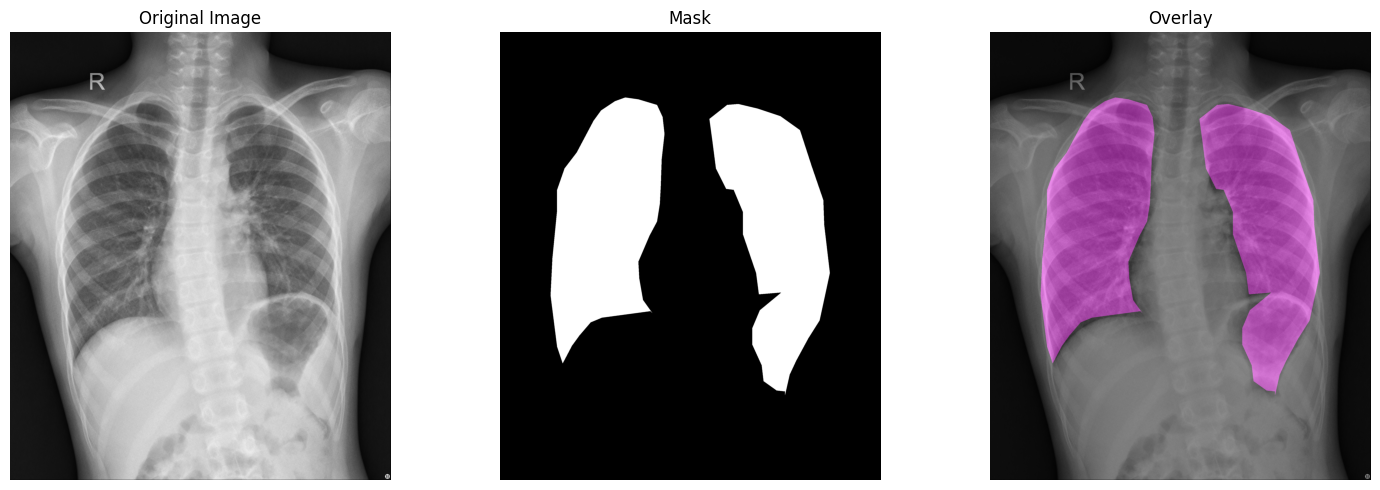

In [33]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

def get_colored_mask(image, mask_image, color=[255, 20, 255]):
    if len(mask_image.shape) == 3:
        mask_image_gray = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
    else:
        mask_image_gray = mask_image

    mask = np.zeros_like(image)
    mask[mask_image_gray > 0] = color  # Colorize mask
    ret = cv2.addWeighted(image, 0.6, mask, 0.4, 0)
    return ret

# Load filenames (ensure only valid images)
filenames = [f for f in next(os.walk(IMG_PATH))[2] if f.endswith(('.png', '.jpg', '.jpeg'))][:3]

for file in filenames:
    # Load image
    img_path = os.path.join(IMG_PATH, file)
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Load mask
    msk_path = os.path.join(MSK_PATH, file)
    msk = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)  # Grayscale mask
    if msk is None:
        print(f"Error: Could not load mask {msk_path}")
        continue

    # Plot original image, mask, and overlay
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(msk, cmap='binary_r')
    plt.title("Mask")
    plt.axis('off')

    plt.subplot(133)
    plt.imshow(get_colored_mask(img, msk))
    plt.title("Overlay")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


  0%|          | 0/704 [00:00<?, ?it/s]

100%|██████████| 704/704 [00:32<00:00, 21.35it/s]


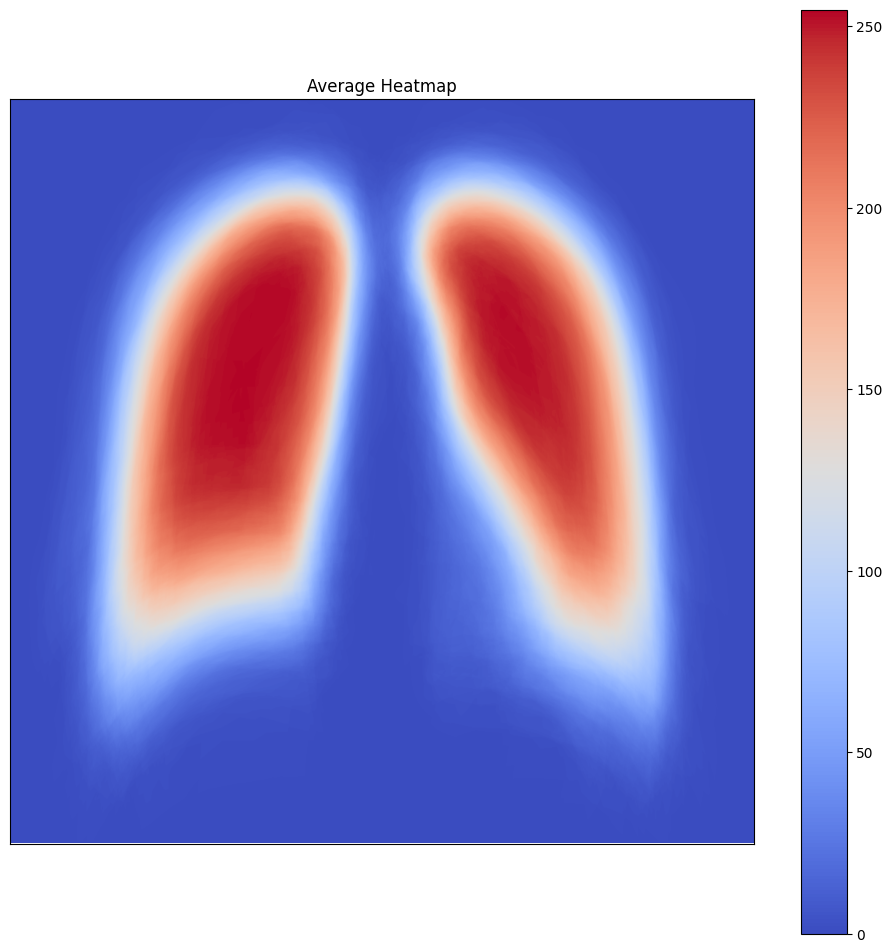

In [35]:
from tqdm import tqdm
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Initialize heatmap with zeros
heatmap = np.zeros((1024, 1024))

# Ensure filenames include only valid images
filenames = [f for f in next(os.walk(MSK_PATH))[2] if f.endswith(('.png', '.jpg', '.jpeg'))]

for file in tqdm(filenames, total=len(filenames)):
    msk_path = os.path.join(MSK_PATH, file)

    # Read mask and handle errors
    msk = cv2.imread(msk_path, cv2.IMREAD_GRAYSCALE)
    if msk is None:
        print(f"Warning: Could not read mask file {msk_path}")
        continue

    # Resize mask to 1024x1024
    msk = cv2.resize(msk, (1024, 1024))

    # Accumulate the mask
    heatmap += msk

# Average the heatmap
if len(filenames) > 0:
    heatmap /= len(filenames)

# Plot the heatmap
plt.figure(figsize=(12, 12))
plt.imshow(heatmap, cmap='coolwarm')
plt.yticks([])
plt.xticks([])
plt.title("Average Heatmap")
plt.colorbar()
plt.show()


In [43]:
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, img_files, mask_files, batch_size=32, size=(512, 512), seed=1, shuffle=True, **kwargs):
        """
        Custom data generator for segmentation tasks.
        
        Args:
        - img_dir: Directory containing the input images
        - mask_dir: Directory containing the corresponding masks
        - batch_size: Number of samples per batch
        - size: The target size for resizing the images and masks
        - seed: Random seed for reproducibility
        - shuffle: Whether to shuffle the dataset after each epoch
        """
        super().__init__(**kwargs)
        
        # List image and mask files
        self.img_filenames = img_files
        self.mask_filenames = mask_files
        
        self.batch_size = batch_size
        self.size = size
        self.seed = seed
        self.shuffle = shuffle
        
        # Ensure the number of images matches the number of masks
        assert len(self.img_filenames) == len(self.mask_filenames), \
            "The number of images and masks must be the same"
        
        self.indexes = np.arange(len(self.img_filenames))  # Indices for shuffling
        
        # If shuffle is enabled, shuffle the indices after each epoch
        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        """
        Returns the number of batches per epoch.
        """
        return int(np.floor(len(self.img_filenames) / self.batch_size))

    def __getitem__(self, index):
        """
        Generates a batch of data (images and corresponding masks).
        
        Args:
        - index: The index of the batch.
        
        Returns:
        - A batch of images and masks
        """
        # Get batch indices
        batch_indices = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        
        # Initialize empty arrays for the batch
        images = []  
        masks = []
        
        for i, idx in enumerate(batch_indices):
            # Load and preprocess image
            img = imread(IMG_PATH + self.img_filenames[idx], mode='L')  # Read image as grayscale
            img = resize(img, self.size)  # Resize to target size
            img = img / 255.0  # Normalize to [0, 1]
            
            # Load and preprocess mask
            mask = imread(MSK_PATH + self.mask_filenames[idx], mode='L')  # Read mask as grayscale
            mask = resize(mask, self.size)  # Resize to target size
            mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
            mask = mask / 255.0  # Normalize to [0, 1]
            mask[mask > 0.5] = 1  # Binary mask
            
            # Add image and mask to the batch arrays
            images.append(img)
            masks.append(mask)
        
        return np.array(images), np.array(masks)

    def on_epoch_end(self):
        """
        Shuffle the dataset after each epoch.
        """
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Prepare the data
img_files, msk_files = sorted(os.listdir(IMG_PATH)), sorted(os.listdir(MSK_PATH))

train_img_files, val_img_files, train_msk_files, val_msk_files = train_test_split(img_files, msk_files, test_size=0.3, random_state=1)

train_data = DataGenerator(
    img_files=train_img_files,        
    mask_files=train_msk_files,    
    batch_size=8,          
    size=(512, 512),
    shuffle=True
)

val_data = DataGenerator(
    img_files=val_img_files,        
    mask_files=val_msk_files,    
    batch_size=8,          
    size=(512, 512),
    shuffle=False
)

In [44]:
# Define U-Net model
def unet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Contracting Path (Encoder)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)  # Batch Normalization
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    conv1 = layers.BatchNormalization()(conv1)  # Batch Normalization
    pool1 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)  # Batch Normalization
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    conv2 = layers.BatchNormalization()(conv2)  # Batch Normalization
    pool2 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.BatchNormalization()(conv3)  # Batch Normalization
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    conv3 = layers.BatchNormalization()(conv3)  # Batch Normalization
    pool3 = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(conv3)

    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.BatchNormalization()(conv4)  # Batch Normalization
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    conv4 = layers.BatchNormalization()(conv4)  # Batch Normalization

    # Expansive Path (Decoder)
    up6 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv4)
    merge6 = layers.concatenate([up6, conv3])
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(merge6)
    conv6 = layers.BatchNormalization()(conv6)  # Batch Normalization
    conv6 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)
    conv6 = layers.BatchNormalization()(conv6)  # Batch Normalization

    up7 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([up7, conv2])
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(merge7)
    conv7 = layers.BatchNormalization()(conv7)  # Batch Normalization
    conv7 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)
    conv7 = layers.BatchNormalization()(conv7)  # Batch Normalization

    up8 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([up8, conv1])
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(merge8)
    conv8 = layers.BatchNormalization()(conv8)  # Batch Normalization
    conv8 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)
    conv8 = layers.BatchNormalization()(conv8)  # Batch Normalization

    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(conv8)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Instantiate the model
input_shape = (512, 512, 1)  # Define the input shape for grayscale images
model = unet(input_shape, 1)  # Create U-Net model for binary segmentation

# Print the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 512, 512,  │        640 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 512, 512,  │     36,928 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 512, 512,  │        256 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 256, 256,  │     73,856 │ max_pooling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_17[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 256, 256,  │    147,584 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        512 │ conv2d_18[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 128, 128,  │    295,168 │ max_pooling2d_4[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │      1,024 │ conv2d_19[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 128, 128,  │    590,080 │ batch_normalizat… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │      1,024 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 64, 64,    │  1,180,160 │ max_pooling2d_5[

 Total params: 7,707,457 (29.40 MB)

 Trainable params: 7,701,825 (29.38 MB)

 Non-trainable params: 5,632 (22.00 KB)

In [47]:
# Jaccard Index Metric
def jaccard_index(y_true, y_pred, smooth=100):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(tf.cast(y_pred, tf.float32), [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    total = tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection
    return (intersection + smooth) / (total + smooth)

# Dice Coefficient Metric
def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1])
    y_pred_f = tf.reshape(tf.cast(y_pred, tf.float32), [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy', dice_coefficient, jaccard_index])

In [64]:
# TensorFlow and Keras Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import Sequence

# Image Processing Libraries
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

# Warnings Management
import warnings
warnings.filterwarnings('ignore')

# GPU Configuration
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print("GPUs available:", tf.config.list_physical_devices('GPU'))

# Paths
IMG_PATH = '/Users/priyasingh/Downloads/lung segmentation/Chest-X-Ray/Chest-X-Ray/image'
MSK_PATH = '/Users/priyasingh/Downloads/lung segmentation/Chest-X-Ray/Chest-X-Ray/mask'

# Validate file paths
img_files = sorted([f for f in os.listdir(IMG_PATH) if f.endswith(('.png', '.jpg', '.jpeg'))])
msk_files = sorted([f for f in os.listdir(MSK_PATH) if f.endswith(('.png', '.jpg', '.jpeg'))])

# Ensure matching filenames between images and masks
valid_files = set(img_files).intersection(set(msk_files))
img_files = [f for f in img_files if f in valid_files]
msk_files = [f for f in msk_files if f in valid_files]

# Split the dataset
train_img_files, val_img_files, train_msk_files, val_msk_files = train_test_split(
    img_files, msk_files, test_size=0.3, random_state=1
)

# Data Generator Class
class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, img_files, mask_files, batch_size=8, size=(512, 512), shuffle=True):
        self.img_files = img_files
        self.mask_files = mask_files
        self.batch_size = batch_size
        self.size = size
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.img_files))
        if self.shuffle:
            self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.img_files) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        images, masks = [], []
        
        for i in batch_indices:
            # Load and preprocess image
            img = cv2.imread(os.path.join(IMG_PATH, self.img_files[i]), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, self.size) / 255.0
            
            # Load and preprocess mask
            mask = cv2.imread(os.path.join(MSK_PATH, self.mask_files[i]), cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, self.size) / 255.0
            mask = np.expand_dims(mask, axis=-1)  # Add channel dimension
            
            images.append(img)
            masks.append(mask)
        
        return np.expand_dims(np.array(images), -1), np.array(masks)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# Data Generators
train_data = DataGenerator(train_img_files, train_msk_files, batch_size=8, size=(512, 512), shuffle=True)
val_data = DataGenerator(val_img_files, val_msk_files, batch_size=8, size=(512, 512), shuffle=False)

# Dice Coefficient Metric
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true_flat = tf.keras.backend.flatten(y_true)
    y_pred_flat = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_flat * y_pred_flat)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_flat) + tf.keras.backend.sum(y_pred_flat) + smooth)

# Jaccard Index Metric
def jaccard_index(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_true_flat = tf.keras.backend.flatten(y_true)
    y_pred_flat = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_flat * y_pred_flat)
    union = tf.keras.backend.sum(y_true_flat) + tf.keras.backend.sum(y_pred_flat) - intersection
    return (intersection + smooth) / (union + smooth)



# U-Net Model Definition
def unet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    # Contracting Path
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    # Expanding Path
    up7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv4)
    up7 = layers.concatenate([up7, conv3])
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = layers.concatenate([up8, conv2])
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = layers.concatenate([up9, conv1])
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(conv9)

    return models.Model(inputs, outputs)

# Compile the Model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[dice_coefficient, jaccard_index]
)

# Checkpoint and Early Stopping
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_dice_coefficient', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_dice_coefficient', patience=2, mode='max', restore_best_weights=True, verbose=1)

# Train the Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,  # Reduced to 5 epochs
    callbacks=[checkpoint, early_stopping],
    verbose=1
)




GPUs available: []
Epoch 1/5
 4/61 ━━━━━━━━━━━━━━━━━━━━ 35:31 37s/step - dice_coefficient: 0.3103 - jaccard_index: 0.1838 - loss: 0.5651